In [1]:
import zipfile as zf
files = zf.ZipFile("archive 2.zip", 'r')
files.extractall('Directory_Cats_dogs')


In [2]:
!pip install opencv-python

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

In [15]:
data= r"C:\Users\thapa\OneDrive\Desktop\DEEP LEARNING\Directory_Cats_dogs"


In [16]:
image_exts=['jpg','jpeg','bmp','png']

In [18]:
import os
import cv2
import imghdr

def process_images(data_dir):
    """
    Processes images within the 'train', 'test', and 'val' subdirectories, 
    checks image validity, and removes invalid images.

    Args:
        data_dir: The root directory containing the 'train', 'test', and 'val' folders.
    """
    for subdir in ['train', 'test']:
        subdir_path = os.path.join(data_dir, subdir)
        for class_name in os.listdir(subdir_path):
            class_path = os.path.join(subdir_path, class_name)
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)

                try:
                    img = cv2.imread(image_path)
                    tip = imghdr.what(image_path)

                    if tip not in ['jpeg', 'png', 'bmp', 'gif']:  
                        os.remove(image_path) 
                        continue

                except Exception as e:
                    print(f'Issue with image: {image_path} - {e}')

process_images(data)

In [19]:
import tensorflow as tf
train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data, 'train'),
    batch_size=32 
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data, 'test'),
    batch_size=32 
)



# Print information about the datasets
print("Train Dataset:")
print(train_ds)

print("\nTest Dataset:")
print(test_ds)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Train Dataset:
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Test Dataset:
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [20]:
""" MAIN CNN PART WILL BE STARTED NOW AFTER LOADING OF THE DATASET"""

' MAIN CNN PART WILL BE STARTED NOW AFTER LOADING OF THE DATASET'

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [23]:
# DUE TO THE HAEVY DATASET : OUR RAM IS GETTING SHORTAGE : THUS WE USE [ GENERATORS ] IN KERAS 
# GENERATOR DIVIDE THE DATA INTO BATCHES OF THE DATASET , 

In [30]:
# THROUGH THIS WE'LL GET A TRAIN DATASET

train_ds = keras.utils.image_dataset_from_directory(
    directory = 'Directory_Cats_dogs/train',
    labels ='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256),
    
)

# test data is described as the validation data

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'Directory_Cats_dogs/test',
    labels ='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [31]:
'''
THIS IMPLIES IN OUR TRAINING DATASET WE HAVE DATA OF 20000 AND ARE BELONGING TO THE TWO CLASSES
AND SAME FOR THE TEST DATA WITH THE DATASET OF 5000 FILES

FURTHER THESE IMAGES ARE TILL NOW STORED AS THE NUMPY ARRAYS , BUT NUMPY VALUES RANGE FROM 1-255, 
 THUS INORDER TO MAKE THE DATA IN THE FORM OF 0 AND 1'S , WE HAVE TO NORMALIZE THE DATASET
 
'''

"\nTHIS IMPLIES IN OUR TRAINING DATASET WE HAVE DATA OF 20000 AND ARE BELONGING TO THE TWO CLASSES\nAND SAME FOR THE TEST DATA WITH THE DATASET OF 5000 FILES\n\nFURTHER THESE IMAGES ARE TILL NOW STORED AS THE NUMPY ARRAYS , BUT NUMPY VALUES RANGE FROM 1-255, \n THUS INORDER TO MAKE THE DATA IN THE FORM OF 0 AND 1'S , WE HAVE TO NORMALIZE THE DATASET\n \n"

In [32]:
# NORMALIZE

def process(image,label):
    image = tf.cast(image/255.,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [33]:
'''
image / 255. → Converts pixel values (0–255) to a range of 0 to 1.
tf.cast(..., tf.float32) → Ensures the image is stored as a 32-bit floating point tensor (important for deep learning models).
Returns → The normalized image and its label.
.map(process) → Applies the process function to each image-label pair in the dataset.
train_ds.map(process) → Normalizes training images.
validation_ds.map(process) → Normalizes validation images.

✅ Improves training stability → Helps models converge faster.
✅ Avoids numerical instability → Prevents large values from dominating calculations.
✅ Common best practice in deep learning for image preprocessing

'''

'\nimage / 255. → Converts pixel values (0–255) to a range of 0 to 1.\ntf.cast(..., tf.float32) → Ensures the image is stored as a 32-bit floating point tensor (important for deep learning models).\nReturns → The normalized image and its label.\n.map(process) → Applies the process function to each image-label pair in the dataset.\ntrain_ds.map(process) → Normalizes training images.\nvalidation_ds.map(process) → Normalizes validation images.\n\n✅ Improves training stability → Helps models converge faster.\n✅ Avoids numerical instability → Prevents large values from dominating calculations.\n✅ Common best practice in deep learning for image preprocessing\n\n'

In [34]:
# NOW START MAKEING THE CNN MODEL

In [36]:
# CNN MODEL

model = Sequential()
#  CONVOLUTION LAYER
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
#  POOLING LAYER
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#  CONVOLUTION LAYER
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))  # 64 filters
#  POOLING LAYER
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#  CONVOLUTION LAYER
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#  POOLING LAYER
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


#  Flatten layer
model.add(Flatten())

# FULLY CONNECTED LAYERS
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\thapa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# COMPILE THE MODEL AND THEN EXXECUTE

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 653s 1s/step - accuracy: 0.6025 - loss: 0.6614 - val_accuracy: 0.6840 - val_loss: 0.5987
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 670s 1s/step - accuracy: 0.7095 - loss: 0.5715 - val_accuracy: 0.7132 - val_loss: 0.5703
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 690s 1s/step - accuracy: 0.7755 - loss: 0.4638 - val_accuracy: 0.7186 - val_loss: 0.6512
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 677s 1s/step - accuracy: 0.8689 - loss: 0.3020 - val_accuracy: 0.7146 - val_loss: 0.8571
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 662s 1s/step - accuracy: 0.9355 - loss: 0.1588 - val_accuracy: 0.7068 - val_loss: 1.2662


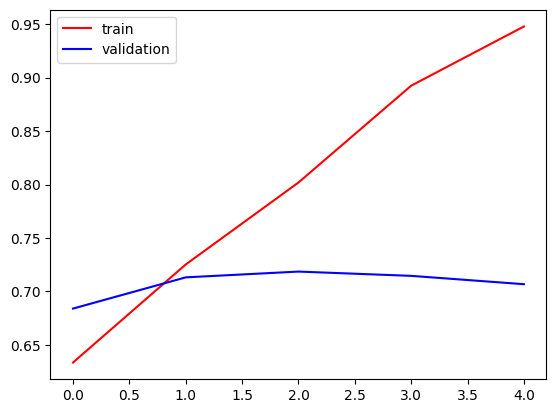

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

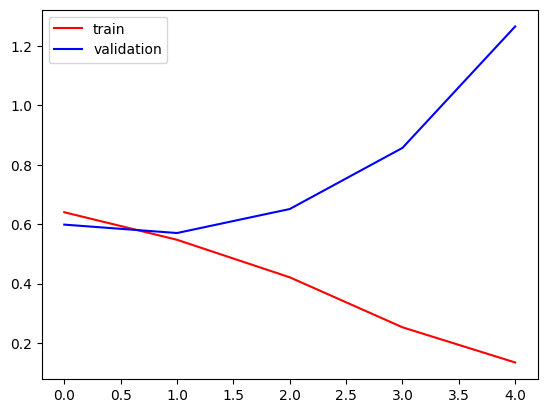

In [43]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [44]:
import cv2

In [47]:
test_img=cv2.imread('catpic.jpg')   # CAT 

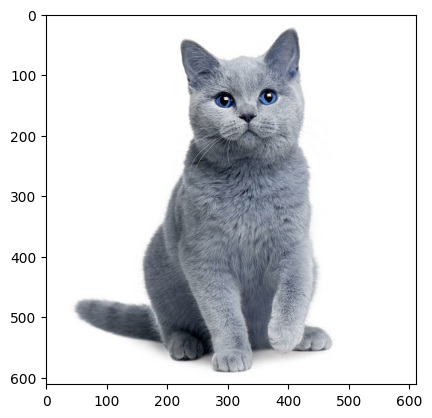

In [48]:
plt.imshow(test_img)

In [49]:
test_img.shape

(611, 612, 3)

In [50]:
test_img=cv2.resize(test_img,(256,256))

In [51]:
test_input=test_img.reshape((1,256,256,3))

In [52]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


array([[0.]], dtype=float32)

In [53]:
# DOG

In [54]:
img2 = cv2.imread('dogpic.jpg')

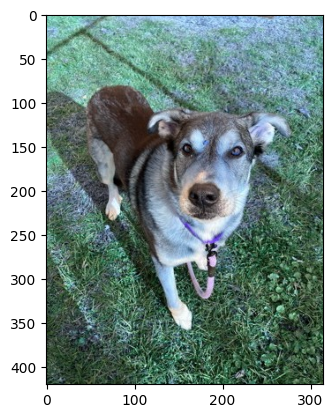

In [55]:
plt.imshow(img2)

In [56]:
img2.shape

(420, 315, 3)

In [60]:
img2=cv2.resize(img2,(256,256))

In [61]:
test2_input= img2.reshape((1,256,256,3))

In [62]:
model.predict(test2_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[1.]], dtype=float32)